<a href="https://colab.research.google.com/github/gkpodder/Linear-Regression/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install torch

In [ ]:
import torch
from torch.nn import Linear

In [ ]:
w = torch.tensor(3.0, requires_grad = True)
b = torch.tensor(1.0, requires_grad = True)


In [ ]:
def forward(x):
  y = w*x + b
  return y

In [ ]:
x = torch.tensor([[4],[7]])
forward(x)

tensor([[13.],
        [22.]], grad_fn=<AddBackward0>)

In [ ]:
torch.manual_seed(1)
model = Linear(in_features = 1, out_features = 1)
print(model.bias,model.weight)

Parameter containing:
tensor([-0.4414], requires_grad=True) Parameter containing:
tensor([[0.5153]], requires_grad=True)


In [ ]:
x = torch.tensor([[2.0],[3.3]])
print(model(x))

tensor([[0.5891],
        [1.2590]], grad_fn=<AddmmBackward>)


In [ ]:
#start
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'x')

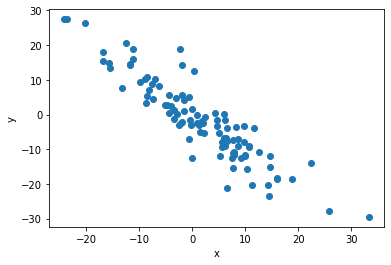

In [ ]:
x = -torch.randn(100,1)*10
y = -x + 5*torch.randn(100,1)
plt.plot(x.numpy(),y.numpy(),'o')
plt.ylabel('y')
plt.xlabel('x')


In [ ]:
#the model
class LR(nn.Module):
  def __init__(self, input_size,output_size):
    super().__init__()
    self.linear = nn.Linear(input_size,output_size)
  def forward(self, x):
    pred = self.linear(x)
    return pred

In [ ]:
#seed for rand values
torch.manual_seed(2)
model = LR(1,1)
print(model) 

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [ ]:
#get weight and bias
[w,b] = model.parameters()
def get_params():
  return(w[0][0].item(),b[0].item())

In [ ]:
#intial plot
#Graph
#line creator
def plot_fit(title):
  plt.title = title
  w1,b1 = get_params()
  x1 = np.array([-30,30])
  y1 = w1*x1 + b1
  plt.plot(x1,y1,'r')
  plt.scatter(x,y)
  plt.show()

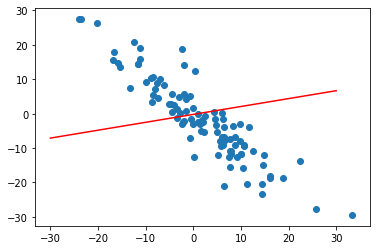

In [ ]:
plot_fit('Initial model')

In [ ]:
#loss function
criterion = nn.MSELoss()
#gradient descent
optimizer = torch.optim.SGD(model.parameters(), lr = 0.009)

In [ ]:
#testing
#epochs: when we pass the dataset when we iterate we must calculate loss and gradient decent each time
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(x)
  #predict of line point and actual point
  loss = criterion(y_pred,y)
  print("epoch:",i,"loss:", loss.item())
  losses.append(loss)  
  #gradients accumulate following the .backward() command
  optimizer.zero_grad()
  loss.backward()
  #update paramaters
  optimizer.step()

epoch: 0 loss: 198.03021240234375
epoch: 1 loss: 169.2321014404297
epoch: 2 loss: 145.18109130859375
epoch: 3 loss: 125.09468078613281
epoch: 4 loss: 108.31907653808594
epoch: 5 loss: 94.30879974365234
epoch: 6 loss: 82.6079330444336
epoch: 7 loss: 72.83567810058594
epoch: 8 loss: 64.67422485351562
epoch: 9 loss: 57.858036041259766
epoch: 10 loss: 52.1652946472168
epoch: 11 loss: 47.4108772277832
epoch: 12 loss: 43.440086364746094
epoch: 13 loss: 40.12372970581055
epoch: 14 loss: 37.35395431518555
epoch: 15 loss: 35.040645599365234
epoch: 16 loss: 33.10856628417969
epoch: 17 loss: 31.494882583618164
epoch: 18 loss: 30.14710235595703
epoch: 19 loss: 29.02140235900879
epoch: 20 loss: 28.0811824798584
epoch: 21 loss: 27.295854568481445
epoch: 22 loss: 26.639902114868164
epoch: 23 loss: 26.091991424560547
epoch: 24 loss: 25.634321212768555
epoch: 25 loss: 25.252017974853516
epoch: 26 loss: 24.932659149169922
epoch: 27 loss: 24.665868759155273
epoch: 28 loss: 24.442989349365234
epoch: 29 lo

Text(0.5, 0, 'epoch')

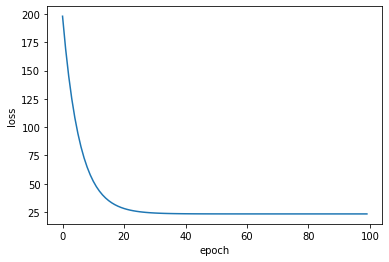

In [ ]:
plt.plot(range(epochs), losses)
plt.ylabel('loss')
plt.xlabel('epoch')

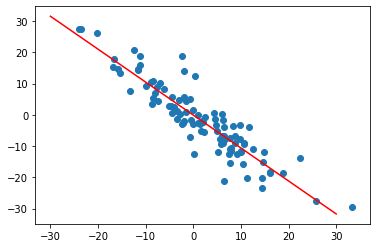

In [ ]:
plot_fit('Trained Model')